# Data Viz

In [ ]:
# import library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set() # revert to matplotlib defaults
plt.rcParams['figure.figsize']= (16, 12)
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# load dataset
cleaned_df= pd.read_csv('./Data/ISB-solcast-clean.csv')
cleaned_df.head()

,Unnamed: 0,MonthPE,Date,Daily_Temp,Daily_Precip,Daily_Humidity,Daily_Pressure,Daily_WindDir,Daily_WindSpeed,Daily_DNI,Daily_GHI,Daily_radiation
0,2018-12-31,12,2018-12-31,10.980000,9.070000,59.2,929.060000,167.300000,1.860000,522.2,324.600000,96.200000
1,2019-01-01,1,2019-01-01,10.570000,14.420000,62.5,925.930000,84.800000,1.520000,1.1,96.300000,96.200000
2,2019-01-02,1,2019-01-02,8.410000,14.450000,91.4,927.230000,109.400000,1.640000,275.8,259.500000,146.100000
3,2019-01-03,1,2019-01-03,9.318182,7.427273,70.0,928.790909,167.363636,1.736364,471.0,294.363636,88.272727
4,2019-01-04,1,2019-01-04,7.530000,13.650000,69.0,926.660000,31.700000,2.610000,9.1,96.700000,92.300000


In [ ]:
# descriptive statistics summary
cleaned_df.describe()

,MonthPE,Daily_Temp,Daily_Precip,Daily_Humidity,Daily_Pressure,Daily_WindDir,Daily_WindSpeed,Daily_DNI,Daily_GHI,Daily_radiation
count,1086.000000,1086.000000,1086.000000,1086.000000,1086.000000,1086.000000,1086.000000,1086.000000,1086.000000,1086.000000
mean,6.471455,23.936275,22.049448,41.327944,931.674881,198.096659,2.195168,316.934305,341.099511,143.105859
std,3.425927,7.973611,13.206991,17.702300,8.065574,62.051003,0.793655,208.625150,136.099470,54.757360
min,1.000000,7.272727,1.740000,8.500000,908.713333,21.692308,0.650000,0.000000,10.181818,10.181818
25%,4.000000,17.523077,11.437689,26.457792,926.271190,154.446429,1.675893,115.892857,263.375000,103.840909
50%,6.000000,24.596474,18.958571,39.435606,932.559524,200.512987,2.025000,348.821429,357.223485,138.519048
75%,9.000000,30.557143,30.206429,53.750000,938.409091,238.466667,2.550000,493.262500,443.732143,178.848214
max,12.000000,40.020000,65.623077,96.545455,946.172727,340.000000,7.525000,736.461538,580.500000,301.000000


In [ ]:
# check the missing values
cleaned_df.isnull().sum()

Unnamed: 0         0
MonthPE            0
Date               0
Daily_Temp         0
Daily_Precip       0
Daily_Humidity     0
Daily_Pressure     0
Daily_WindDir      0
Daily_WindSpeed    0
Daily_DNI          0
Daily_GHI          0
Daily_radiation    0
dtype: int64

In [ ]:
# summary of dataframe
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1086 entries, 0 to 1085
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       1086 non-null   object 
 1   MonthPE          1086 non-null   int64  
 2   Date             1086 non-null   object 
 3   Daily_Temp       1086 non-null   float64
 4   Daily_Precip     1086 non-null   float64
 5   Daily_Humidity   1086 non-null   float64
 6   Daily_Pressure   1086 non-null   float64
 7   Daily_WindDir    1086 non-null   float64
 8   Daily_WindSpeed  1086 non-null   float64
 9   Daily_DNI        1086 non-null   float64
 10  Daily_GHI        1086 non-null   float64
 11  Daily_radiation  1086 non-null   float64
dtypes: float64(9), int64(1), object(2)
memory usage: 101.9+ KB


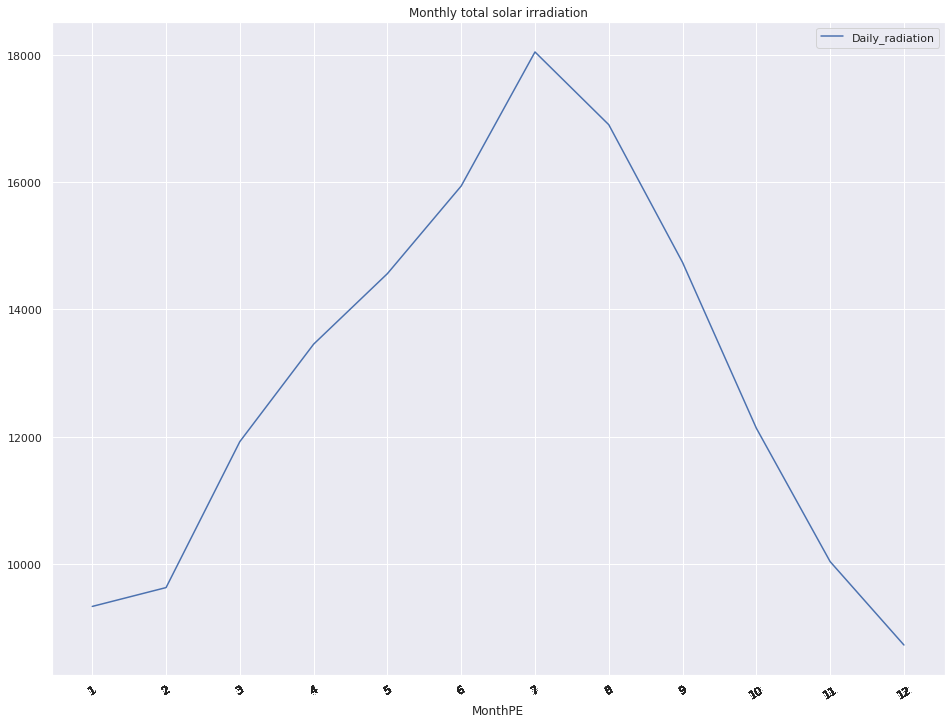

In [ ]:
# plot of total irradiation for each 
rad_vs_month= cleaned_df.loc[:, ['Daily_radiation', 'MonthPE']].groupby('MonthPE').sum()
rad_vs_month.plot()
plt.xticks(cleaned_df['MonthPE'], rotation=30)
plt.title('Monthly total solar irradiation')
plt.show()

In [ ]:
cleaned_df["Date"]

0       2018-12-31
1       2019-01-01
2       2019-01-02
3       2019-01-03
4       2019-01-04
           ...    
1081    2021-12-16
1082    2021-12-17
1083    2021-12-18
1084    2021-12-19
1085    2021-12-20
Name: Date, Length: 1086, dtype: object

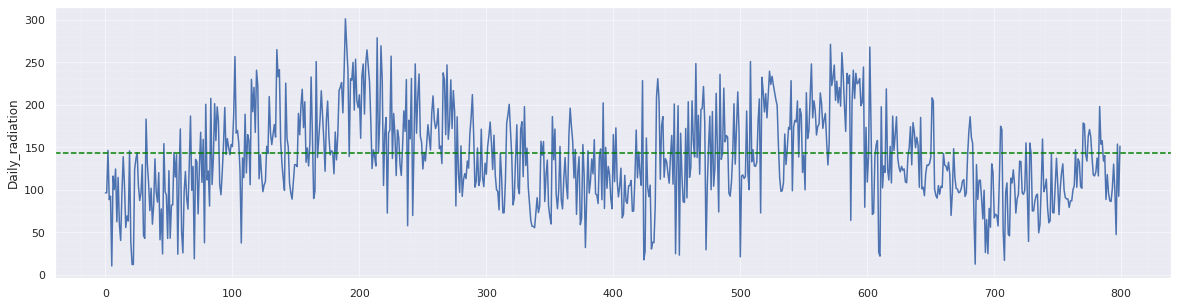

In [ ]:
# daily solar irradiation plot
f, ax = plt.subplots(figsize=(20, 5))
sns.lineplot(x = cleaned_df[0:800].index, y=cleaned_df[0:800]["Daily_radiation"])

rad_avg= cleaned_df['Daily_radiation'].mean()
ax.axhline(rad_avg, color='green', linestyle='--', label=f"Mean - {rad_avg:.2f}")

ax.set_axisbelow(True)
ax.minorticks_on()
ax.grid(which='major', linestyle='-', linewidth=0.5, color='white',)
ax.grid(which='minor', linestyle=':', linewidth=0.5, color='white', alpha=0.7)

plt.show()
ax.legend();

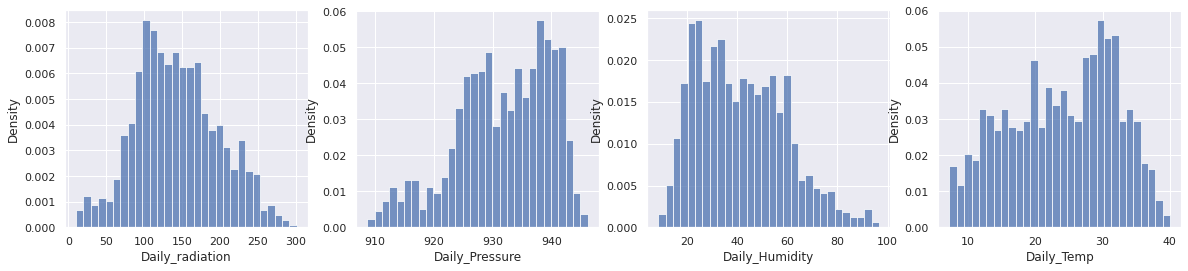

In [ ]:
# histogram distribution of weather features and solar irradiation
f, ax = plt.subplots(1, 4, figsize=(20,4))
sns.histplot(cleaned_df['Daily_radiation'], stat="density", bins=30, ax=ax[0])
sns.histplot(cleaned_df['Daily_Pressure'], stat="density", bins=30, ax=ax[1])
sns.histplot(cleaned_df['Daily_Humidity'], stat="density", bins=30, ax=ax[2])
sns.histplot(cleaned_df['Daily_Temp'], stat="density", bins=30, ax=ax[3])
plt.show();

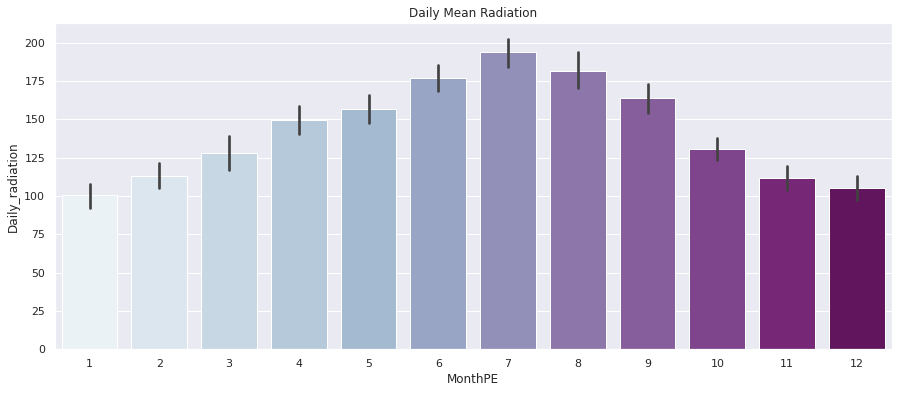

In [ ]:
# histogram plot of daily mean radiation
fig, ax = plt.subplots(figsize=(15, 6))
sns.barplot(x="MonthPE", y='Daily_radiation', data= cleaned_df, palette= "BuPu")
ax.set_title('Daily Mean Radiation')
plt.show()

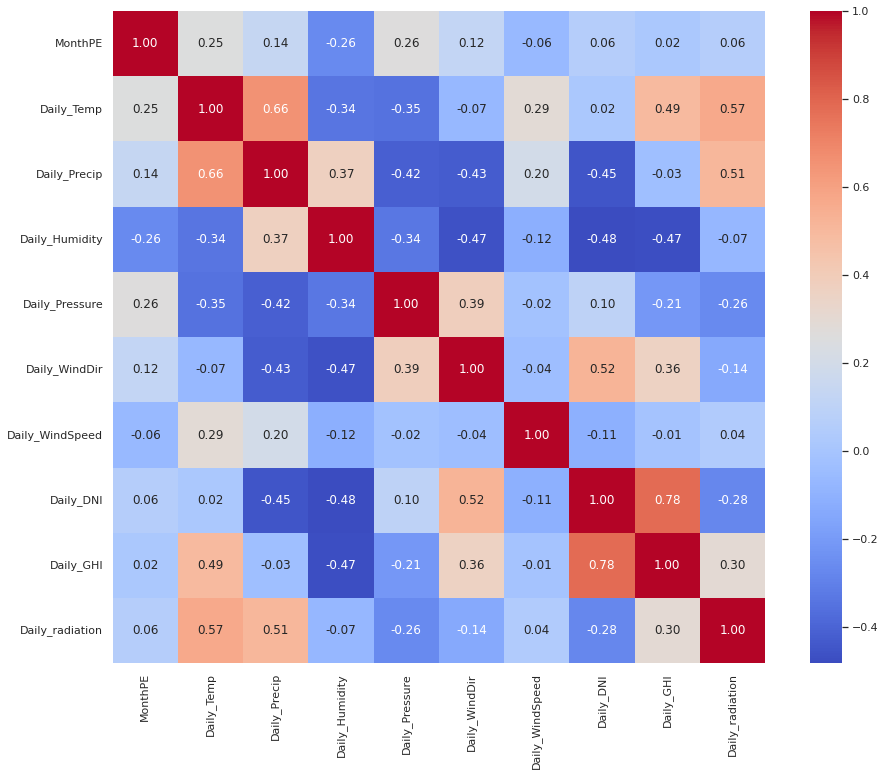

In [ ]:
# feature correlation
corr= cleaned_df.corr(method = "pearson")

sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap="coolwarm", square=True, annot=True, fmt=".2f")
plt.show()

### Statistical check: stationary or non-stationary

In [ ]:
# adfuller test on target feature
from statsmodels.tsa.stattools import adfuller
Xrad = cleaned_df['Daily_radiation'].values
result = adfuller(Xrad)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value)) 

# good value for p-value is <= 0.05

ADF Statistic: -4.175755
p-value: 0.000724
Critical Values:
	1%: -3.436
	5%: -2.864
	10%: -2.568


In [ ]:
Xrad = cleaned_df['Daily_radiation'].astype(int)
Xrad_log = np.log(Xrad.values)

# adfuller test
result= adfuller(Xrad_log)

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -3.721531
p-value: 0.003820
	1%: -3.437
	5%: -2.864
	10%: -2.568


In [ ]:
# calculated daily shift in radiation
rad_data = cleaned_df['Daily_radiation'] - cleaned_df['Daily_radiation'].shift(1)

In [ ]:
# adfuller test day shifted feature
X_shift = rad_data[1:].values
result = adfuller(X_shift)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -11.109926
p-value: 0.000000
Critical Values:
	1%: -3.437
	5%: -2.864
	10%: -2.568


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=0e4e8441-2ef4-4299-9537-9ff4fec216e1' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>